In [1]:
import numpy as np
test = np.load('NDVI_X_test.npy')
train = np.load('NDVI_X_train.npy')
valid = np.load('NDVI_X_valid.npy')
print(test.shape, train.shape, valid.shape)

(2631, 5, 40, 40) (12274, 5, 40, 40) (2630, 5, 40, 40)


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/home/mgraca/Workspace/hrrr-smoke-viz')
from libs.pwwb.utils.dataset import sliding_window

def plot(data, dates):
    np.random.seed(42)
    row, col = 1, 5
    n_samples = dates.shape[0]
    n_frames = dates.shape[1]   
    # Pick 25 sample indices roughly equidistant
    sample_indices = np.linspace(0, n_samples - 1, row*col, dtype=int)
    
    fig, axes = plt.subplots(row, col, figsize=(10, 10))
    
    for ax, s in zip(axes.ravel(), sample_indices):
        # Pick a random sample and frame
        f = np.random.randint(data.shape[1])   # random frame
        img = data[s, f]
        ax.imshow(img)
        ax.set_title(f"Sample {s}, Frame {f}\nDate {dates[s, f]}", fontsize=8)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

dates = np.array(
    pd.date_range("2023-08-02", "2025-08-02", freq='h', inclusive='left')
    .strftime('%Y-%m-%d-%H')
    .tolist()
)
X_dates, _ = sliding_window(dates, 5)
X_dates.shape

2025-08-20 14:22:30.704401: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(17535, 5)

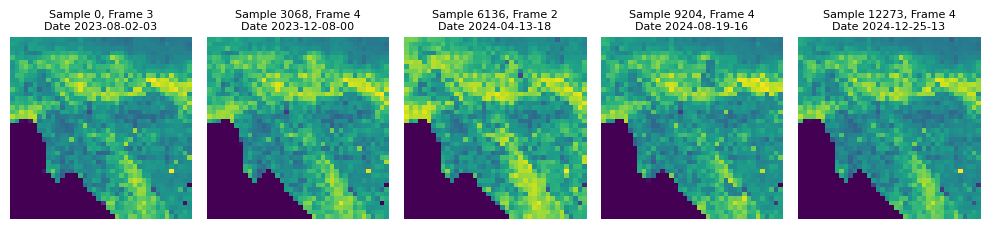

In [7]:
plot(train, X_dates[:train.shape[0],:])

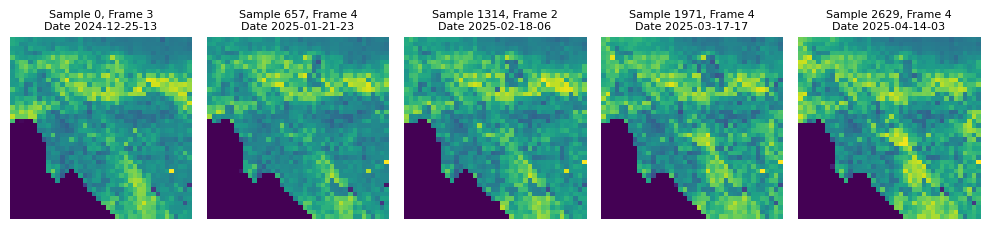

In [8]:
plot(valid, X_dates[train.shape[0]:train.shape[0]+valid.shape[0],:])

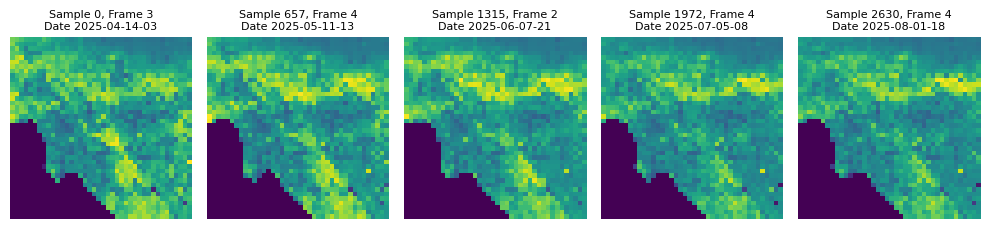

In [9]:
plot(test, X_dates[train.shape[0]+valid.shape[0]:,:])